# **Tarea de la semana 3**

### 12_Linear_regression
#### Perform linear regressions of salinity vs temperature and dec vs salinity.

In [5]:
# Importamos las librerías y leemos los datos con pandas

def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)
# Path to the file to be imported
path = "Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
CO2Data = import_csv(path)

In [ ]:
CO2Data.head()

#### Realizamos el codigo para encontrar la regresión lineal simple Salinidad vs Temperatura

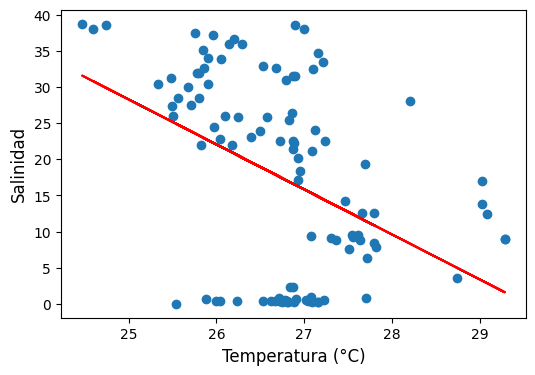

r-squared: 0.17749929096684752
p_value: 6.879907520531154e-06
slope: -6.237079764689512
intercept: 184.22846870564854


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x_temp = CO2Data['temp_c']
y_sal = CO2Data['sal_psu']

plt.scatter(x_temp, y_sal, label='original data')

# Add labels and title
plt.xlabel('Temperatura (°C)', fontsize = 12, )
plt.ylabel('Salinidad (Psu)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_temp, y_sal)

# Plot linear regression 

plt.plot(x_temp, intercept + slope*x_temp, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)


plt.show()

print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

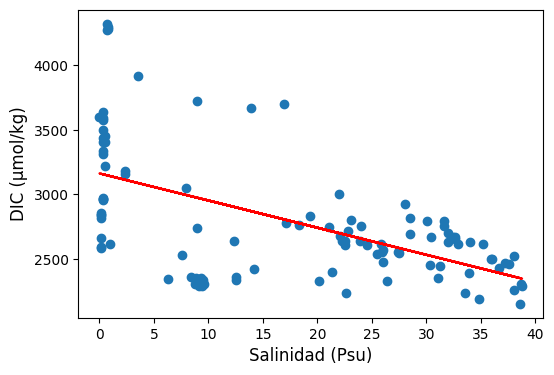

r-squared: 0.32710473310227767
p_value: 1.51441040237653e-10
slope: -21.053197646779633
intercept: 3162.874756459312


In [9]:
x_sal = CO2Data['sal_psu']
y_dic = CO2Data['dic_micromol_kg']

plt.scatter(x_sal, y_dic, label='original data')

# Add labels and title
plt.xlabel('Salinidad (Psu)', fontsize = 12, )
plt.ylabel('DIC (µmol/kg)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_sal, y_dic)

# Plot linear regression 

plt.plot(x_sal, intercept + slope*x_sal, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)


plt.show()

print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)